In [206]:
from seleniumbase import Driver
from selenium.webdriver.common.keys import Keys

from rich.pretty import pprint
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [28]:
driver =  Driver(uc=True, uc_cdp_events=True)

In [99]:
driver.open(
    "https://www.marinetraffic.com/en/ais/home/centerx:132.2/centery:43.0/zoom:10")
driver.sleep(3)

# Close cookie notice
try:
    driver.click('button:contains("AGREE")', timeout=3)
except Exception as e:
    pass

In [83]:
def urlPositionParser(url):
    regex = r"centerx:(\-?\d+(?:\.\d+)*)/centery:(\-?\d+(?:\.\d+)*)/zoom:(\d+)"
    matches = re.findall(regex, url)
    data = {}
    data["x"] = float(matches[0][0])
    data["y"] = float(matches[0][1])
    data["zoom"] = int(matches[0][2])
    return data

def getCurrentPosition():
  driver.sleep(1.5)
  return urlPositionParser(driver.current_url)

In [74]:
getCurrentPosition()

{'x': 131.99, 'y': 43.325, 'zoom': 12}

In [98]:
# Basic movement functions

def moveX(steps):
    map = driver.find_element("div#map_canvas")
    if (steps < 0):
        steps = abs(steps)
        for i in range(steps):
            map.send_keys(Keys.ARROW_LEFT)
            driver.sleep(0.4)
    else:
        for i in range(steps):
            map.send_keys(Keys.ARROW_RIGHT)
            driver.sleep(0.4)


def moveY(steps):
    map = driver.find_element("div#map_canvas")
    if (steps < 0):
        steps = abs(steps)
        for i in range(steps):
            map.send_keys(Keys.ARROW_DOWN)
            driver.sleep(0.4)
    else:
        for i in range(steps):
            map.send_keys(Keys.ARROW_UP)
            driver.sleep(0.4)


def zoomInOut(steps):
    if (steps < 0):
        steps = abs(steps)
        for i in range(steps):
            driver.click('a[title="Zoom out"]')
            driver.sleep(0.8)
    else:
        for i in range(steps):
            driver.click('a[title="Zoom in"]')
            driver.sleep(0.8)


def zoomSet(targetZoom):
    currentZoom = getCurrentPosition()["zoom"]
    deltaZoom = targetZoom - currentZoom
    zoomInOut(deltaZoom)

In [86]:
def movementXCalcDelta(zoom, steps, count):
  zoomSet(zoom)

  pos = getCurrentPosition()["x"]

  rounds = [pos]
  deltas = []

  for i in range(count - 1):
    moveX(steps)
    newpos = getCurrentPosition()["x"]
    rounds.append(newpos)
    deltas.append(newpos - pos)
    pos = newpos

  return [rounds, deltas]

def movementYCalcDelta(zoom, steps, count):
  zoomSet(zoom)

  pos = getCurrentPosition()["y"]

  rounds = [pos]
  deltas = []

  for i in range(count - 1):
    moveY(steps)
    newpos = getCurrentPosition()["y"]
    rounds.append(newpos)
    deltas.append(newpos - pos)
    pos = newpos

  return [rounds, deltas]

In [94]:
zoomes = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [100]:
dataDeltasX = []
for zoom in zoomes:
    driver.open(
        "https://www.marinetraffic.com/en/ais/home/centerx:10.0/centery:10.0/zoom:10")
    driver.sleep(3)
    deltas = movementXCalcDelta(zoom, 10, 6)[1]
    dataDeltasX.append(deltas)
dataDeltasX

[[21.1,
  35.199999999999996,
  35.10000000000001,
  35.19999999999999,
  35.099999999999994],
 [17.6, 17.6, 17.5, 17.599999999999994, 17.60000000000001],
 [8.8, 8.8, 8.799999999999997, 8.800000000000004, 8.699999999999996],
 [4.4, 4.4, 4.399999999999999, 4.400000000000002, 4.399999999999999],
 [2.1999999999999993,
  2.200000000000001,
  2.200000000000001,
  2.1999999999999993,
  2.1999999999999993],
 [1.0999999999999996,
  1.0999999999999996,
  1.1000000000000014,
  1.0999999999999996,
  1.0999999999999996],
 [0.5, 0.5999999999999996, 0.5, 0.5999999999999996, 0.5],
 [0.27500000000000036,
  0.27399999999999913,
  0.27500000000000036,
  0.27500000000000036,
  0.27399999999999913],
 [0.13700000000000045,
  0.1379999999999999,
  0.13700000000000045,
  0.13699999999999868,
  0.1379999999999999],
 [0.06900000000000084,
  0.06799999999999962,
  0.06899999999999906,
  0.062000000000001165,
  0.06799999999999962]]

In [136]:
dataDeltasY = []
for zoom in zoomes:
    driver.open(
        "https://www.marinetraffic.com/en/ais/home/centerx:10.0/centery:10.0/zoom:10")
    driver.sleep(3)
    deltas = movementYCalcDelta(zoom, 10, 6)[1]
    dataDeltasY.append(deltas)
dataDeltasY

[[31.1, 21.299999999999997, 12.399999999999999, 7.0, 1.7000000000000028],
 [16.6, 14.5, 11.899999999999999, 9.399999999999999, 7.100000000000001],
 [8.5,
  8.100000000000001,
  7.600000000000001,
  6.899999999999999,
  6.299999999999997],
 [4.300000000000001,
  4.199999999999999,
  4.100000000000001,
  4.0,
  3.8999999999999986],
 [2.1999999999999993,
  2.1000000000000014,
  2.099999999999998,
  2.1000000000000014,
  2.1000000000000014],
 [1.0999999999999996,
  1.0999999999999996,
  1.0,
  1.1000000000000014,
  1.0999999999999996],
 [0.5, 0.5999999999999996, 0.5, 0.5999999999999996, 0.5],
 [0.2699999999999996,
  0.2710000000000008,
  0.2699999999999996,
  0.26900000000000013,
  0.2699999999999996],
 [0.1349999999999998,
  0.1349999999999998,
  0.136000000000001,
  0.1349999999999998,
  0.1349999999999998],
 [0.06799999999999962,
  0.06700000000000017,
  0.06799999999999962,
  0.06700000000000017,
  0.06799999999999962]]

In [137]:
[item[3] for item in dataDeltasX]

[35.19999999999999,
 17.599999999999994,
 8.800000000000004,
 4.400000000000002,
 2.1999999999999993,
 1.0999999999999996,
 0.5999999999999996,
 0.27500000000000036,
 0.13699999999999868,
 0.062000000000001165]

In [138]:
[item[3] for item in dataDeltasY]

[7.0,
 9.399999999999999,
 6.899999999999999,
 4.0,
 2.1000000000000014,
 1.1000000000000014,
 0.5999999999999996,
 0.26900000000000013,
 0.1349999999999998,
 0.06700000000000017]

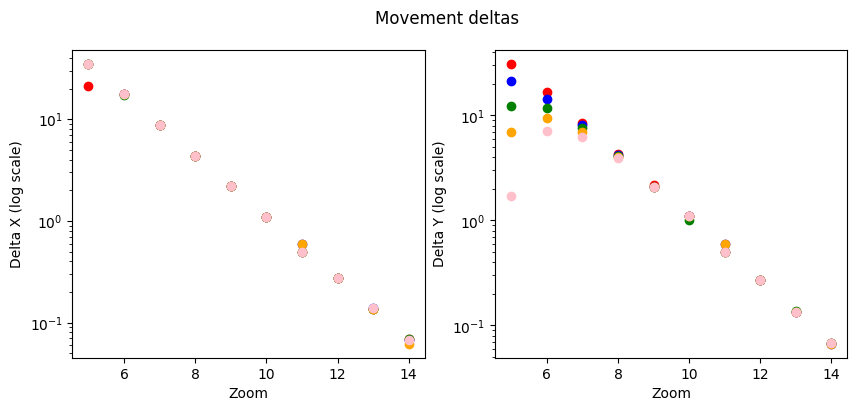

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Movement deltas")

colors = ['red', 'blue', 'green', 'orange', 'pink']

axs[0].set_yscale('log')
axs[0].set_xlabel("Zoom")
axs[0].set_ylabel("Delta X (log scale)")

for i in range (5):
  axs[0].scatter(zoomes, [item[i] for item in dataDeltasX], color=colors[i])

axs[1].set_yscale('log')
axs[1].set_xlabel("Zoom")
axs[1].set_ylabel("Delta Y (log scale)")

for i in range (5):
  axs[1].scatter(zoomes, [item[i] for item in dataDeltasY], color=colors[i])

plt.show()

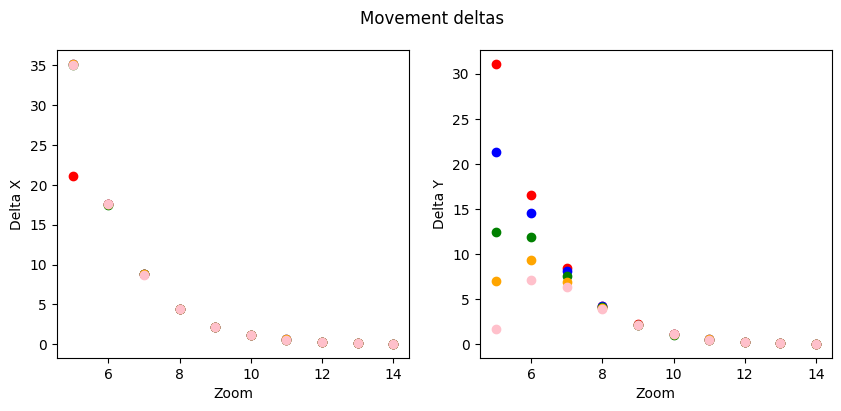

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Movement deltas")

colors = ['red', 'blue', 'green', 'orange', 'pink']

axs[0].set_xlabel("Zoom")
axs[0].set_ylabel("Delta X")

for i in range (5):
  axs[0].scatter(zoomes, [item[i] for item in dataDeltasX], color=colors[i])

axs[1].set_xlabel("Zoom")
axs[1].set_ylabel("Delta Y")

for i in range (5):
  axs[1].scatter(zoomes, [item[i] for item in dataDeltasY], color=colors[i])

plt.show()

In [185]:
stepsMapX = {}
steps = [np.median(i) for i in dataDeltasX]
for i in range(len(steps)):
  stepsMapX[zoomes[i]] = steps[i]
stepsMapX

{5: 35.10000000000001,
 6: 17.6,
 7: 8.8,
 8: 4.4,
 9: 2.1999999999999993,
 10: 1.0999999999999996,
 11: 0.5,
 12: 0.27500000000000036,
 13: 0.13700000000000045,
 14: 0.06799999999999962}

In [186]:
stepsMapY = {}
steps = [np.median(i) for i in dataDeltasY]
for i in range(len(steps)):
  stepsMapY[zoomes[i]] = steps[i]
stepsMapY

{5: 12.399999999999999,
 6: 11.899999999999999,
 7: 7.600000000000001,
 8: 4.100000000000001,
 9: 2.1000000000000014,
 10: 1.0999999999999996,
 11: 0.5,
 12: 0.2699999999999996,
 13: 0.1349999999999998,
 14: 0.06799999999999962}

In [245]:
def stepSelectorX(delta):
  minSteps = None
  suggestedStep = 0
  for step in stepsMapX:
    val = stepsMapX[step]
    needSteps = math.floor(delta / val)
    # print(f"{delta} % {val} ({step}) = {needSteps}")
    if (minSteps == None or minSteps > needSteps) and needSteps != 0:
      minSteps = needSteps
      suggestedStep = step
  return (suggestedStep, minSteps)

def stepSelectorY(delta):
  minSteps = None
  suggestedStep = 0
  for step in stepsMapY:
    val = stepsMapY[step]
    needSteps = math.floor(delta / val)
    # print(f"{delta} % {val} ({step}) = {needSteps}")
    if (minSteps == None or minSteps > needSteps) and needSteps != 0:
      minSteps = needSteps
      suggestedStep = step
  return (suggestedStep, minSteps)

In [241]:
stepSelectorX(100)

100 % 35.10000000000001 (5) = 2
100 % 17.6 (6) = 5
100 % 8.8 (7) = 11
100 % 4.4 (8) = 22
100 % 2.1999999999999993 (9) = 45
100 % 1.0999999999999996 (10) = 90
100 % 0.5 (11) = 200
100 % 0.27500000000000036 (12) = 363
100 % 0.13700000000000045 (13) = 729
100 % 0.06799999999999962 (14) = 1470


(5, 2)

In [247]:
stepSelectorY(0.01)

(0, None)

In [208]:
3 / 2

1.5

In [210]:
3.2 % 2

1.2000000000000002

In [207]:
math.fmod(12, 5)

2.0

In [250]:
def moveToPos(targetX, targetY):
    for i in range(20):
        pos = getCurrentPosition()
        poxX = pos["x"]
        poxY = pos["y"]
        deltaX = targetX - poxX
        deltaY = targetY - poxY

        calcX = stepSelectorX(deltaX)
        calcY = stepSelectorY(deltaY)

        print(f"calcX: {calcX}")
        print(f"calcY: {calcY}")

        if deltaX > 0.05 and deltaY > 0.05:
            if calcX[0] != 0 and calcX[1] != None and calcX[1] != 0:
                zoomSet(calcX[0])
                moveX(calcX[1])
            if (calcX[0] != calcY[0] and calcY[0] != 0):
                zoomSet(calcY[0])
            if calcY[1] != 0 and calcY[1] != None and calcY[1] != 0:
                moveY(calcY[1])
        else:
            break

In [251]:
moveToPos(140, 43)

calcX: (8, 1)
calcY: (14, 1)
calcX: (8, 1)
calcY: (0, None)
calcX: (9, 1)
calcY: (14, 1)
calcX: (9, 1)
calcY: (0, None)


KeyboardInterrupt: 